In [6]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

c:\Users\manan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\manan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [7]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [8]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Get sample sizes
print(f"Train samples: {len(case_hold['train'])}")
print(f"Validation samples: {len(case_hold['validation'])}")
print(f"Test samples: {len(case_hold['test'])}")

Train samples: 45000
Validation samples: 3900
Test samples: 3600


In [11]:
# Get sample text from the dataset
# Fetch the entire 'context' column as a list
sample_text = case_hold["train"]["context"]

print(f"Number of training examples: {len(sample_text)}")

# Print the first 5 contexts (truncated)
for i, ctx in enumerate(sample_text[:5]):
    print(f"\n--- Sample {i} ---")
    print(ctx[:500] + "...\n")


Number of training examples: 45000

--- Sample 0 ---
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...


--- Sample 1 ---
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a se

## Text Preprocessing Pipeline



In [12]:
# Define preprocessing functions
# Tokenization of text into words
def tokenize_text(text):
    """Split text into individual words"""
    return word_tokenize(text)

In [13]:
# Lowercase the tokenized words
def lowercase_tokens(tokens):
    """Convert all tokens to lowercase"""
    return [token.lower() for token in tokens]


In [14]:
# Remove common stopwords (e.g., 'the', 'is', 'in')and punctuations from the text
def remove_stopwords(tokens):
    """Remove common stopwords"""
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]

def remove_punctuation(tokens):
    """Remove punctuation and non-alphanumeric tokens"""
    return [token for token in tokens if token.isalnum()]


In [15]:
def preprocess_text(text):
    """Apply all preprocessing steps in sequence"""
    tokens = tokenize_text(text)
    tokens_lower = lowercase_tokens(tokens)
    tokens_no_stop = remove_stopwords(tokens_lower)
    tokens_no_punct = remove_punctuation(tokens_no_stop)
    return {
        'original': text,
        'tokenized': tokens,
        'lowercase': tokens_lower,
        'no_stopwords': tokens_no_stop,
        'no_punctuation': tokens_no_punct
    }

In [16]:
# Apply preprocessing to all samples
preprocessed_samples = []
for i, text in enumerate(sample_text):
    if i < 45000: # Limit to first 45000 samples for demonstration
        preprocessed_samples.append(preprocess_text(text))
    else:
        break

print(f"Preprocessed {len(preprocessed_samples)} samples")

# Convert preprocessed data to a format suitable for CSV
preprocessed_data = []
for i, sample in enumerate(preprocessed_samples):
    # Create a row for each sample with sample index and preprocessing stages
    sample_data = {
        'sample_id': i,
        'original_text': sample['original'],  # Truncate original text to avoid huge CSV
        'tokens_clean': ' '.join(sample['no_punctuation'])
    }
    preprocessed_data.append(sample_data)

# Convert to DataFrame
import pandas as pd
import os

# Convert to DataFrame
df = pd.DataFrame(preprocessed_data)

# Create directory for output if it doesn't exist
output_dir = "preprocessed_data"
os.makedirs(output_dir, exist_ok=True)

# # Save to CSV
# csv_path = os.path.join(output_dir, "preprocessed_samples.csv")
# df.to_csv(csv_path, index=False)

# print(f"\nSaved preprocessed data to {csv_path}")
# print(f"DataFrame shape: {df.shape}")

# Display the first few rows of the DataFrame
print("\nPreview of the saved data:")
display(df.head())

Preprocessed 45000 samples

Preview of the saved data:


,sample_id,original_text,tokens_clean
0,0,"Drapeau’s cohorts, the cohort would be a “vict...",drapeau cohorts cohort would victim making bom...
1,1,Colameta used customer information that he too...,colameta used customer information took protég...
2,2,property tax sale. In reviewing section 6323(b...,property tax sale reviewing section 6323 b 6 c...
3,3,They also rely on Oswego Laborers’ Local 214 P...,also rely oswego laborers local 214 pension fu...
4,4,did not affect the defendant’s guideline range...,affect defendant guideline range sentence redu...


## Detailed Analysis of any sample for dislaying Preprocessing Steps

In [17]:
# Focus on Sample 1 for detailed analysis
sample_idx = 3
sample = preprocessed_samples[sample_idx]

# Original text
print(f"ORIGINAL TEXT (truncated):\n{sample['original'][:500]}...\n")

# Step 1: Tokenization
print(f"STEP 1: TOKENIZATION (first 50 tokens)")
print(sample['tokenized'][:78])
print(f"Total tokens: {len(sample['tokenized'])}\n")

# Step 2: Lowercase
print(f"STEP 2: LOWERCASE (first 50 tokens)")
print(sample['lowercase'][:78])
print(f"Total tokens: {len(sample['lowercase'])}\n")

# Step 3: Stopword Removal
print(f"STEP 3: STOPWORD REMOVAL (first 50 tokens)")
print(sample['no_stopwords'][:78])
print(f"Total tokens: {len(sample['no_stopwords'])}\n")

# Step 4: Punctuation Removal
print(f"STEP 4: PUNCTUATION REMOVAL (first 50 tokens)")
print(sample['no_punctuation'][:78])
print(f"Total tokens: {len(sample['no_punctuation'])}\n")

ORIGINAL TEXT (truncated):
They also rely on Oswego Laborers’ Local 214 Pension Fund v. Marine Midland Bank, 85 N.Y.2d 20, 623 N.Y.S.2d 529, 647 N.E.2d 741 (1995), which held that a plaintiff “must demonstrate that the acts or practices have a broader impact on consumers at large.” Defs.’ Mem. at 14 (quoting Oswego Laborers’, 623 N.Y.S.2d 529, 647 N.E.2d at 744). As explained above, however, Plaintiffs have adequately alleged that Defendants’ unauthorized use of the DEL MONICO’S name in connection with non-Ocinomled resta...

STEP 1: TOKENIZATION (first 50 tokens)
['They', 'also', 'rely', 'on', 'Oswego', 'Laborers', '’', 'Local', '214', 'Pension', 'Fund', 'v.', 'Marine', 'Midland', 'Bank', ',', '85', 'N.Y.2d', '20', ',', '623', 'N.Y.S.2d', '529', ',', '647', 'N.E.2d', '741', '(', '1995', ')', ',', 'which', 'held', 'that', 'a', 'plaintiff', '“', 'must', 'demonstrate', 'that', 'the', 'acts', 'or', 'practices', 'have', 'a', 'broader', 'impact', 'on', 'consumers', 'at', 'large.', '”', 'Def

In [18]:
# Frequency Analysis for Sample 1
tokens_sample1 = sample['no_punctuation']
word_freq = Counter(tokens_sample1)

# Display most common words
print("TOP 20 WORDS IN SAMPLE 1 (after preprocessing):")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

TOP 20 WORDS IN SAMPLE 1 (after preprocessing):
oswego: 2
laborers: 2
623: 2
529: 2
647: 2
impact: 2
consumers: 2
use: 2
consumer: 2
commscope: 2
triathlon: 2
also: 1
rely: 1
local: 1
214: 1
pension: 1
fund: 1
marine: 1
midland: 1
bank: 1


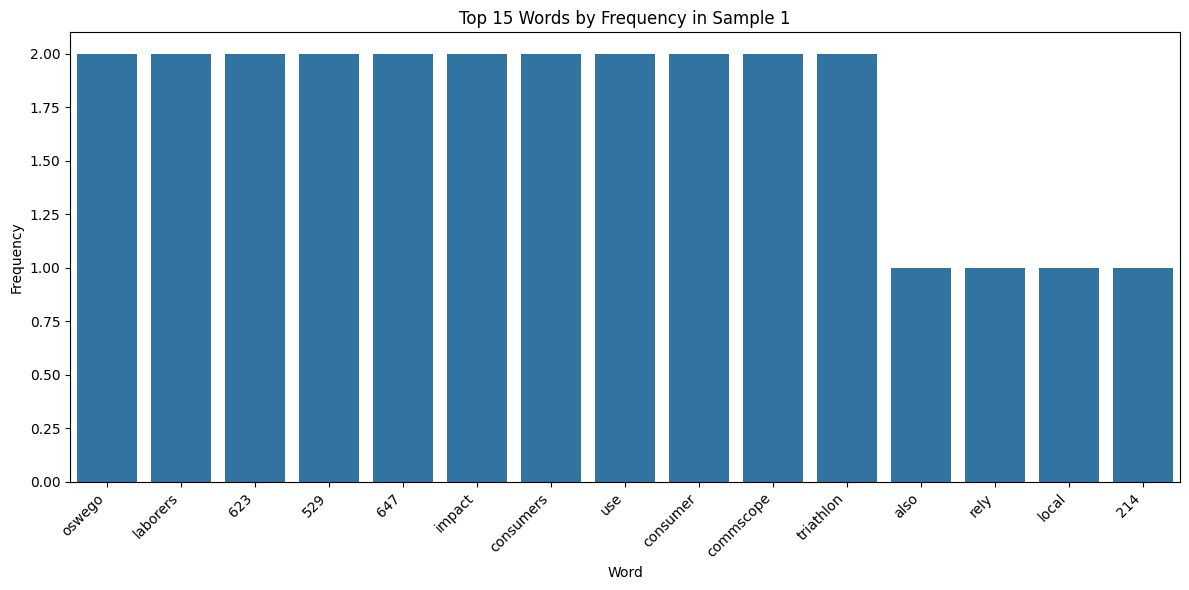

In [19]:
# Visualize the word frequency
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(15))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 15 Words by Frequency in Sample 1')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Aggregated Analysis Across All Preprocessed Samples

In [20]:
# Combine all preprocessed tokens
all_tokens = []
for sample in preprocessed_samples:
    all_tokens.extend(sample['no_punctuation'])

# Calculate frequency distribution
all_word_freq = Counter(all_tokens)

print(f"Total unique words across all samples: {len(all_word_freq)}")
print("\nTOP 20 WORDS ACROSS ALL SAMPLES:")
for word, count in all_word_freq.most_common(20):
    print(f"{word}: {count}")

Total unique words across all samples: 88797

TOP 20 WORDS ACROSS ALL SAMPLES:
see: 50968
holding: 47114
court: 46724
state: 22464
states: 17938
also: 17767
united: 17033
id: 13777
evidence: 13220
defendant: 12775
case: 12357
trial: 12128
law: 11705
would: 11059
may: 11044
claim: 10937
district: 10840
whether: 9946
1: 9822
2: 8515


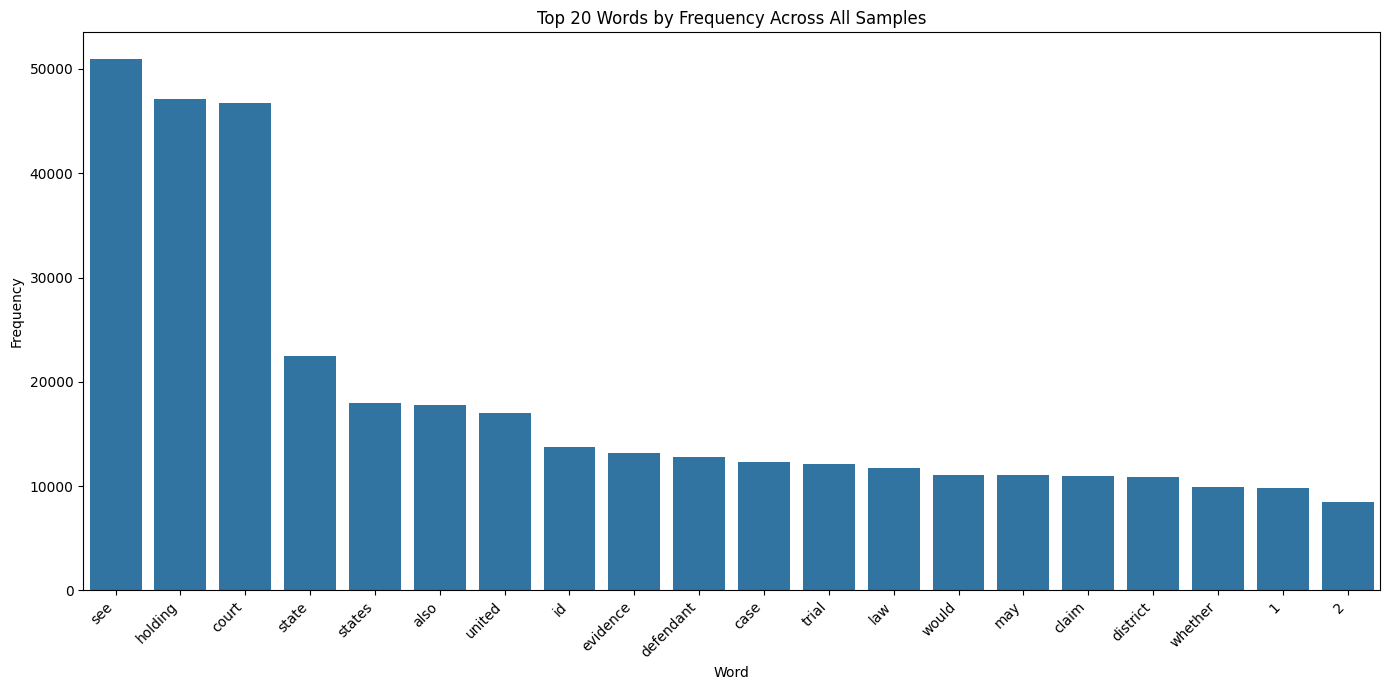

In [21]:
# Visualize word frequency across all samples
plt.figure(figsize=(14, 7))
top_all_words = dict(all_word_freq.most_common(20))
sns.barplot(x=list(top_all_words.keys()), y=list(top_all_words.values()))
plt.title('Top 20 Words by Frequency Across All Samples')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Named Entity Recognition (NER) on Individual Samples

We'll perform NER on each preprocessed sample individually to extract legal entities such as people, organizations, laws, etc.

In [22]:
# Install spaCy if not already installed
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

# Load the spaCy model
print("Loading spaCy model...")
nlp = spacy.load('en_core_web_lg')
print("Model loaded successfully!")

Loading spaCy model...
Model loaded successfully!


In [23]:
# Load the preprocessed data
try:
    # If preprocessed data is already in memory, use it
    df.head()
except NameError:
    # Otherwise, load from file
    csv_path = os.path.join("preprocessed_data", "preprocessed_samples.csv")
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} preprocessed samples from {csv_path}")

# Display first few rows
df.head()

,sample_id,original_text,tokens_clean
0,0,"Drapeau’s cohorts, the cohort would be a “vict...",drapeau cohorts cohort would victim making bom...
1,1,Colameta used customer information that he too...,colameta used customer information took protég...
2,2,property tax sale. In reviewing section 6323(b...,property tax sale reviewing section 6323 b 6 c...
3,3,They also rely on Oswego Laborers’ Local 214 P...,also rely oswego laborers local 214 pension fu...
4,4,did not affect the defendant’s guideline range...,affect defendant guideline range sentence redu...


In [24]:
import random
from datetime import datetime, timedelta

# Function to generate a random date string
def generate_random_date():
    start_date = datetime(2000, 1, 1)
    end_date = datetime(2025, 12, 31)
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    random_date = start_date + timedelta(days=random_days)
    return random_date.strftime("%d %B %Y")  # Format: "12 March 2021"

# Updated entity extraction function
def extract_entities(text):
    """
    Process a text sample with spaCy and extract entities.
    
    Args:
        text (str): The text to process
        
    Returns:
        tuple: (doc, entities_dict)
    """
    doc = nlp(text)
    
    legal_entities = {
        "PERSON": [],
        "ORG": [],
        "DATE": [generate_random_date()],  # Add a random date instead of extracting
        "MONEY": [],
        "LAW": [],
        "GPE": [],
        "NORP": [],
        "CARDINAL": [],
        "ORDINAL": []
    }
    
    for ent in doc.ents:
        if ent.label_ != "DATE" and ent.label_ in legal_entities:
            legal_entities[ent.label_].append(ent.text)
    
    return doc, legal_entities


In [25]:
num_samples = 4500

results = []
for i in range(min(num_samples, len(df))):
    sample = df.iloc[i]
    text = sample['original_text']  # Use original text for better entity extraction
    sample_id = sample['sample_id']
    
    # Process text (truncate to first 1000 chars to avoid processing too much)
    doc, entities = extract_entities(text[:1000])
    
    # Store results
    results.append({
        "sample_id": sample_id,
        "text": text[:500] + "...",  # For display purposes
        "doc": doc,
        "entities": entities
    })

    # Print linewise progress
    print(f"Sample {i+1}/{min(num_samples, len(df))} processed.")
    print(f"Sample ID: {sample_id}")
    print(f"Extracted Entities: {entities}")
    print("-" * 50)

print(f"Processed {len(results)} samples.")


Sample 1/4500 processed.
Sample ID: 0
Extracted Entities: {'PERSON': ['Drapeau'], 'ORG': ['Newman', 'Dodge'], 'DATE': ['13 March 2025'], 'MONEY': [], 'LAW': [], 'GPE': ['See United States', 'United States'], 'NORP': [], 'CARDINAL': ['125', '863', '846', '181'], 'ORDINAL': ['10th']}
--------------------------------------------------
Sample 2/4500 processed.
Sample ID: 1
Extracted Entities: {'PERSON': [], 'ORG': ['Colameta', 'Colameta', 'G.L.c', 'G.L.c', 'Warner-Lambert Co.', 'Augat, Inc.'], 'DATE': ['14 March 2009'], 'MONEY': [], 'LAW': [], 'GPE': ['Mass.', 'Mass.'], 'NORP': [], 'CARDINAL': ['at least two', '266', '93', '42', '427', '409', '173'], 'ORDINAL': []}
--------------------------------------------------
Sample 3/4500 processed.
Sample ID: 2
Extracted Entities: {'PERSON': ['Taylor', 'Taylor'], 'ORG': ['Court', 'S.E.2d', 'Court', 'Capco', 'Summerville, Inc.', 'J.H. Gayle Constr'], 'DATE': ['07 October 2007'], 'MONEY': [], 'LAW': ['section 7425'], 'GPE': ['S.C.', 'S.C.'], 'NORP': 

In [26]:
# Display entity visualization for the first sample
sample_idx = 3  # Change this to view different samples
sample_result = results[sample_idx]

print(f"Sample ID: {sample_result['sample_id']}")
print("Sample text (truncated):")
print(sample_result['text'])
print("\nEntities found:")

# Display entity visualization
displacy.render(sample_result['doc'], style="ent", jupyter=True)

# Display entity counts by type
print("\nEntity counts by type:")
for entity_type, entities in sample_result['entities'].items():
    if entities:  # Only show non-empty entity types
        print(f"{entity_type}: {len(entities)} ({', '.join(entities[:5])}{'...' if len(entities) > 5 else ''})")

Sample ID: 3
Sample text (truncated):
They also rely on Oswego Laborers’ Local 214 Pension Fund v. Marine Midland Bank, 85 N.Y.2d 20, 623 N.Y.S.2d 529, 647 N.E.2d 741 (1995), which held that a plaintiff “must demonstrate that the acts or practices have a broader impact on consumers at large.” Defs.’ Mem. at 14 (quoting Oswego Laborers’, 623 N.Y.S.2d 529, 647 N.E.2d at 744). As explained above, however, Plaintiffs have adequately alleged that Defendants’ unauthorized use of the DEL MONICO’S name in connection with non-Ocinomled resta...

Entities found:



Entity counts by type:
PERSON: 2 (Defs, N.D.N.Y.)
ORG: 9 (Oswego Laborers’ Local 214 Pension Fund, Marine Midland Bank, N.Y.S.2d 529, Oswego Laborers’, N.Y.S.2d 529...)
DATE: 1 (05 February 2011)
GPE: 3 (N.C., U.S.A., New York City Triathlon)
CARDINAL: 7 (85, 623, 647, 623, 647...)


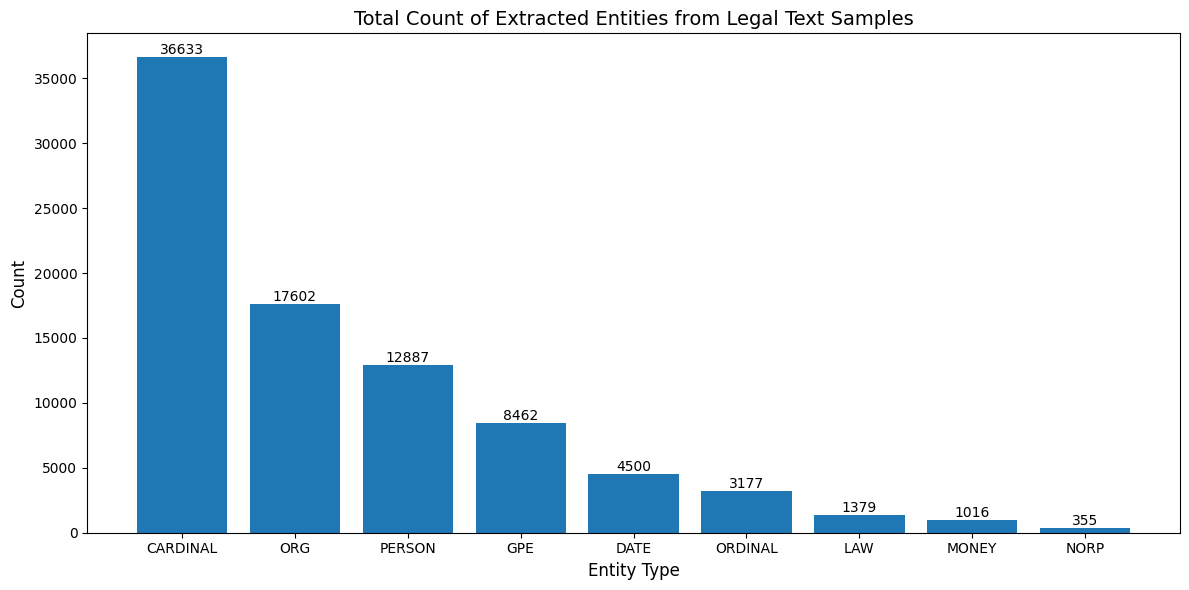

In [27]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Aggregate entity counts
entity_counts = defaultdict(int)

for result in results:
    for entity_type, entity_list in result["entities"].items():
        entity_counts[entity_type] += len(entity_list)

# Convert to sorted list of tuples for plotting
sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)
entity_labels = [item[0] for item in sorted_entities]
entity_values = [item[1] for item in sorted_entities]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(entity_labels, entity_values)
plt.title("Total Count of Extracted Entities from Legal Text Samples", fontsize=14)
plt.xlabel("Entity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Vectorization Technique (Tf-Idf & GloVe)

##   1. Vectorization through Tf-Idf 

The TF-IDF (Term Frequency-Inverse Document Frequency) model is a fundamental text processing technique that helps identify the importance of words in documents. In our legal document matching task, we use TF-IDF to find the most relevant holdings for a given citing prompt.

In [28]:
import pandas as pd

# Load preprocessed citing_prompt data
preprocessed_samples = pd.read_excel("casehold_citing_prompt_preprocessed.xlsx")

# Convert string representations of lists back into actual lists (Excel saves them as strings)
import ast

for col in ['tokenized', 'lowercase', 'no_stopwords', 'no_punctuation']:
    preprocessed_samples[col] = preprocessed_samples[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Focus on Sample 1 for detailed analysis
sample_idx = 1
sample = preprocessed_samples.iloc[sample_idx]

# Original text
print(f"ORIGINAL TEXT (truncated):\n{sample['original'][:500]}...\n")

# Step 1: Tokenization
print("STEP 1: TOKENIZATION (first 78 tokens)")
print(sample['tokenized'][:78])
print(f"Total tokens: {len(sample['tokenized'])}\n")

# Step 2: Lowercase
print("STEP 2: LOWERCASE (first 78 tokens)")
print(sample['lowercase'][:78])
print(f"Total tokens: {len(sample['lowercase'])}\n")

# Step 3: Stopword Removal
print("STEP 3: STOPWORD REMOVAL (first 78 tokens)")
print(sample['no_stopwords'][:78])
print(f"Total tokens: {len(sample['no_stopwords'])}\n")

# Step 4: Punctuation Removal
print("STEP 4: PUNCTUATION REMOVAL (first 78 tokens)")
print(sample['no_punctuation'][:78])
print(f"Total tokens: {len(sample['no_punctuation'])}\n")


ORIGINAL TEXT (truncated):
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management informat...

STEP 1: TOKENIZATION (first 78 tokens)
['Colameta', 'used', 'customer', 'information', 'that', 'he', 'took', 'from', 'Protégé', '.', 'Additionally', ',', 'Colameta', 'admits', 'to', 'having', 'taken', 'at', 'least', 'two', 'Protégé', 'proposals', 'with', 'him', 'to', 'Monument', '.', 'This', 'type', 'of', 'information', 'may', 'constitute', 'trade', 'secrets', '.', 'See', 'G.L.c', '.', '266', ',', '§30', '(', 'defining', '“', 'trade', 'secret', '”', 'as', 'used', 

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Excel file
df = pd.read_excel("casehold_train.xlsx")

# Strip whitespace and lower all column names
df.columns = df.columns.str.strip().str.lower()

# Print all column names to debug
print(" Available columns:\n", df.columns.tolist())

# Define best matching column function
def get_best_column_match(possible_names):
    for name in possible_names:
        for col in df.columns:
            if name.lower() in col.lower():
                return col
    return None

# Try to find correct column names
example_id_col = get_best_column_match(["example_id"])
citing_prompt_col = get_best_column_match(["citing_prompt"])
holding_cols = [get_best_column_match([f"holding_{i}"]) for i in range(5)]

# Check if any column is missing
if not all([example_id_col, citing_prompt_col] + holding_cols):
    print(" Error: One or more required columns not found.")
    print(" Detected:", example_id_col, citing_prompt_col, holding_cols)
else:
    print(" Matched Columns:")
    print(f"Example ID Column: {example_id_col}")
    print(f"Citing Prompt Column: {citing_prompt_col}")
    print(f"Holding Columns: {holding_cols}")

    # TF-IDF Logic
    def find_best_holding(example_id):
        row = df[df[example_id_col] == example_id]

        if row.empty:
            return f" No data found for example_id: {example_id}"

        citing_prompt = row[citing_prompt_col].values[0]
        holdings = [row[col].values[0] for col in holding_cols]

        corpus = [citing_prompt] + holdings

        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
        similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

        best_index = similarities.argmax()
        best_score = similarities[best_index]
        best_holding_col = holding_cols[best_index]

        return {
            'example_id': example_id,
            'best_holding': best_holding_col,
            'similarity_score': round(float(best_score), 4),
            'holding_text': holdings[best_index]
        }

    # Try it!
    example_id_input = 3
    result = find_best_holding(example_id_input)
    print("\n Best Holding Result:")
    print(result)


 Available columns:
 ['example_id', 'citing_prompt', 'holding_0', 'holding_1', 'holding_2', 'holding_3', 'holding_4']
 Matched Columns:
Example ID Column: example_id
Citing Prompt Column: citing_prompt
Holding Columns: ['holding_0', 'holding_1', 'holding_2', 'holding_3', 'holding_4']

 Best Holding Result:
{'example_id': 3, 'best_holding': 'holding_0', 'similarity_score': 0.1123, 'holding_text': 'holding that plaintiff stated a  349 claim where plaintiff alleged facts plausibly suggesting that defendant intentionally registered its corporate name to be confusingly similar to plaintiffs commscope trademark'}


In [30]:
# Example: Try a few more examples
for example_id in [0,1,2,3,4]:
    result = find_best_holding(example_id)
    print(f"\nExample {example_id}:")
    print(f"Best holding: {result['best_holding']}")
    print(f"Similarity score: {result['similarity_score']}")
    print(f"Holding text (truncated): {result['holding_text'][:100]}...")


Example 0:
Best holding: holding_0
Similarity score: 0.3567
Holding text (truncated): holding that possession of a pipe bomb is a crime of violence for purposes of 18 usc  3142f1...

Example 1:
Best holding: holding_4
Similarity score: 0.2331
Holding text (truncated): recognizing a legitimate need to protect an employee from disclosing an employers trade secrets or o...

Example 2:
Best holding: holding_0
Similarity score: 0.1915
Holding text (truncated): holding that where there is a conflict between statutes the more recent statute is controlling and a...

Example 3:
Best holding: holding_0
Similarity score: 0.1123
Holding text (truncated): holding that plaintiff stated a  349 claim where plaintiff alleged facts plausibly suggesting that d...

Example 4:
Best holding: holding_2
Similarity score: 0.2711
Holding text (truncated): holding that united states v booker 543 us 220 125 sct 738 160 led2d 621 2005 did not alter the stan...


## 2. Vectorization using GloVe Word Embeddings

Now we'll use pre-trained GloVe word embeddings to create document vectors and find the most similar holdings.

In [31]:
import numpy as np
import os
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from datasets import load_dataset

# Load the dataset with trust_remote_code
dataset = load_dataset("casehold/casehold", trust_remote_code=True)

# Convert the training data to a DataFrame
df = pd.DataFrame(dataset['train'])

# Make sure we have the necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Path to GloVe embeddings
glove_path = "glove.6B/glove.6B.100d.txt"


print(f"✅ Found GloVe embeddings: {glove_path}")

✅ Found GloVe embeddings: glove.6B/glove.6B.100d.txt


In [32]:
# Load GloVe embeddings
def load_glove_embeddings(glove_path):
    print("Loading GloVe embeddings...")
    embeddings_dict = {}

    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f):
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector

    print(f"Loaded {len(embeddings_dict)} word vectors")
    return embeddings_dict

# Load if file exists
if os.path.exists(glove_path):
    glove_embeddings = load_glove_embeddings(glove_path)
else:
    glove_embeddings = None

Loading GloVe embeddings...


0it [00:00, ?it/s]

Loaded 400000 word vectors


In [33]:
# Preprocess text - similar to your existing preprocessing but focused on GloVe embedding lookup
def preprocess_for_glove(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return tokens

# Convert document to vector using GloVe embeddings
def document_to_vec(text, embeddings_dict, embedding_size=100):
    tokens = preprocess_for_glove(text)
    # Initialize document vector
    doc_vector = np.zeros(embedding_size)
    # Count valid tokens (words found in embeddings)
    valid_token_count = 0

    # Sum up embeddings of all tokens
    for token in tokens:
        if token in embeddings_dict:
            doc_vector += embeddings_dict[token]
            valid_token_count += 1

    # Average the vectors (if no valid tokens, return zero vector)
    if valid_token_count > 0:
        doc_vector /= valid_token_count

    return doc_vector

# Calculate cosine similarity between two vectors
def cosine_similarity_vectors(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    # Handle zero vectors
    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)

In [34]:
# Function to find best holding using GloVe embeddings - independent from TF-IDF
def find_best_holding_glove(example_id, embeddings_dict):
    if embeddings_dict is None:
        return "GloVe embeddings not loaded. Please load them first."
    
    # Get data directly from dataset
    example_data = dataset['train'].filter(lambda x: x['example_id'] == example_id)
    
    if len(example_data) == 0:
        return f" No data found for example_id: {example_id}"
    
    # Extract first (and should be only) example
    example = example_data[0]
    
    # Get citing prompt and holdings for this example
    citing_prompt = example['citing_prompt']
    holdings = [example[f'holding_{i}'] for i in range(5)]
    
    # Convert citing prompt to vector
    prompt_vec = document_to_vec(citing_prompt, embeddings_dict)
    
    # Convert each holding to vector and calculate similarity
    similarities = []
    for i, holding in enumerate(holdings):
        holding_vec = document_to_vec(holding, embeddings_dict)
        similarity = cosine_similarity_vectors(prompt_vec, holding_vec)
        similarities.append(similarity)
    
    # Find best match
    best_index = np.argmax(similarities)
    best_score = similarities[best_index]
    best_holding = f"holding_{best_index}"
    
    return {
        'example_id': example_id,
        'best_holding': best_holding,
        'similarity_score': round(float(best_score), 4),
        'holding_text': holdings[best_index]
    }

In [35]:
# Test GloVe similarity on a few examples
if glove_embeddings is not None:
    for example_id in [0,1, 2, 3]:
        result = find_best_holding_glove(example_id, glove_embeddings)
        if isinstance(result, dict):
            print(f"\nExample {example_id}:")
            print(f"Best holding: {result['best_holding']}")
            print(f"Similarity score: {result['similarity_score']}")
            print(f"Holding text (truncated): {result['holding_text'][:100]}...")
        else:
            print(result)


Example 0:
Best holding: holding_4
Similarity score: 0.9219
Holding text (truncated): holding that a court must only look to the statutory definition not the underlying circumstances of ...

Example 1:
Best holding: holding_1
Similarity score: 0.9478
Holding text (truncated): holding that included among trade secrets employee may not appropriate from employer is certain info...

Example 2:
Best holding: holding_4
Similarity score: 0.8799
Holding text (truncated): holding that a specific statutory provision prevails over a more general one...

Example 3:
Best holding: holding_1
Similarity score: 0.8245
Holding text (truncated): holding that plaintiff stated a claim for breach of contract when it alleged the government failed t...


## Legal Document Generation using Jinja2 Templates

This section uses Jinja2 templating to generate legal documents from our NER results.

In [36]:
# Install Jinja2 if not already installed
# !pip install jinja2

import jinja2
from jinja2 import Template
from IPython.display import display, HTML
import ipywidgets as widgets

In [37]:
# Define a legal document template using Jinja2
legal_document_template = """
<!DOCTYPE html>
<html>
<head>
<style>
body {
    font-family: 'Times New Roman', Times, serif;
    margin: 2.5cm;
    line-height: 1.5;
}
.header {
    text-align: center;
    margin-bottom: 20px;
}
.title {
    font-size: 18pt;
    font-weight: bold;
    text-align: center;
    margin: 20px 0;
}
.section {
    margin: 15px 0;
}
.section-title {
    font-weight: bold;
    text-decoration: underline;
}
.signature {
    margin-top: 50px;
}
.date {
    margin-top: 20px;
}
.indent {
    margin-left: 20px;
}
</style>
</head>
<body>
<div class="header">
    <h2>LEGAL MEMORANDUM</h2>
    <p>Case No. {{ case_number }}</p>
</div>

<div class="section">
    <p class="section-title">DATE:</p>
    <p>{{ date }}</p>
</div>

<div class="section">
    <p class="section-title">PARTIES INVOLVED:</p>
    <ul>
    {% for person in persons %}
        <li>{{ person }}</li>
    {% endfor %}
    </ul>
</div>

<div class="section">
    <p class="section-title">ORGANIZATIONS MENTIONED:</p>
    <ul>
    {% for org in organizations %}
        <li>{{ org }}</li>
    {% endfor %}
    </ul>
</div>

<div class="section">
    <p class="section-title">JURISDICTION:</p>
    <ul>
    {% for place in places %}
        <li>{{ place }}</li>
    {% endfor %}
    </ul>
</div>

<div class="section">
    <p class="section-title">LEGAL REFERENCES:</p>
    <ul>
    {% for law in laws %}
        <li>{{ law }}</li>
    {% endfor %}
    </ul>
</div>

<div class="section">
    <p class="section-title">MONETARY VALUES INVOLVED:</p>
    <ul>
    {% for money in monetary_values %}
        <li>{{ money }}</li>
    {% endfor %}
    </ul>
</div>

<div class="section">
    <p class="section-title">CASE SUMMARY:</p>
    <p class="indent">{{ summary }}</p>
</div>

<div class="date">
    <p>DATED this {{ date }}.</p>
</div>

{% if judge %}
<div class="signature">
    <p>____________________________</p>
    <p>JUDGE {{ judge }}</p>
</div>
{% endif %}

</body>
</html>
"""

# Create Jinja2 template
template = Template(legal_document_template)

In [38]:
def generate_legal_document(corpus_index):
    """
    Generate a legal document based on a corpus index using NER extraction
    
    Args:
        corpus_index (int): Index of the corpus in the dataset
        
    Returns:
        str: Rendered legal document HTML
    """
    # Check if corpus index is valid
    if corpus_index < 0 or corpus_index >= len(sample_text):
        return f"Error: Corpus index {corpus_index} is out of range. Valid range: 0-{len(sample_text)-1}"
    
    # Get the text from the corpus
    corpus_text = sample_text[corpus_index]
    
    # Process the first 1000 characters to avoid processing too much text
    doc, entities = extract_entities(corpus_text[:1000])
    
    # Extract a potential judge (usually a PERSON entity mentioned close to "Judge")
    judge = None
    for token in doc:
        if token.text.lower() == "judge" and token.i < len(doc)-1:
            next_tokens = [doc[token.i+i] for i in range(1, 4) if token.i+i < len(doc)]
            for next_token in next_tokens:
                if next_token.ent_type_ == "PERSON":
                    judge = next_token.text
                    break
            if judge:
                break
    
    # Create a summary from the text
    summary = corpus_text[:500] + "..." if len(corpus_text) > 500 else corpus_text
    
    # Use unique entities to avoid repetition
    unique_persons = list(set(entities["PERSON"]))[:8]  # Limit to 8 for readability
    unique_orgs = list(set(entities["ORG"]))[:8]
    unique_places = list(set(entities["GPE"]))[:8]
    unique_laws = list(set(entities["LAW"]))[:8]
    unique_money = list(set(entities["MONEY"]))[:8]
    
    # Prepare data for the template
    template_data = {
        "case_number": f"CASE-{corpus_index:05d}",  # Format case number with leading zeros
        "date": entities["DATE"][0] if entities["DATE"] else "N/A",
        "persons": unique_persons if unique_persons else ["No individuals identified"],
        "organizations": unique_orgs if unique_orgs else ["No organizations identified"],
        "places": unique_places if unique_places else ["No locations identified"],
        "laws": unique_laws if unique_laws else ["No legal references identified"],
        "monetary_values": unique_money if unique_money else ["No monetary values identified"],
        "summary": summary,
        "judge": judge
    }
    
    # Render the template with the extracted data
    rendered_document = template.render(**template_data)
    
    return rendered_document

In [39]:
def generate_document_ui():
    """
    User interface to generate a legal document from corpus index
    """
    # Create input widget
    corpus_input = widgets.IntText(
        value=3,  # Default value
        description='Corpus Index:',
        min=0,
        max=len(sample_text)-1
    )
    
    # Create output widget
    output = widgets.Output()
    
    # Button to generate document
    button = widgets.Button(description="Generate Legal Document")
    
    # Handle button click
    def on_button_clicked(b):
        with output:
            output.clear_output()
            corpus_idx = corpus_input.value
            document = generate_legal_document(corpus_idx)
            display(HTML(document))
            print(f"\nDocument generated for corpus #{corpus_idx}")
    
    button.on_click(on_button_clicked)
    
    # Display widgets
    display(corpus_input)
    display(button)
    display(output)
    
    print(f"Enter a corpus index between 0 and {len(sample_text)-1} and click 'Generate Legal Document'")

# Execute the UI function
generate_document_ui()

IntText(value=3, description='Corpus Index:')

Button(description='Generate Legal Document', style=ButtonStyle())

Output()

Enter a corpus index between 0 and 44999 and click 'Generate Legal Document'


In [40]:
# Example: directly generate and display a document for a specific corpus
corpus_idx = 3  # Change this to try different corpus texts
document = generate_legal_document(corpus_idx)
display(HTML(document))

In [41]:
# Save the document to an HTML file
def save_legal_document(corpus_idx, filename=None):
    """Save generated legal document to an HTML file"""
    if filename is None:
        filename = f"legal_document_case_{corpus_idx}.html"
    
    document = generate_legal_document(corpus_idx)
    
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(document)
    
    print(f"Document saved as {filename}")
    
    return filename

# Example usage
# save_legal_document(3)

## Comparing Accuracy of TF-IDF vs GloVe Models

Let's evaluate both models by comparing their accuracy in identifying the correct holding from the test dataset.

In [42]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_dataset

# Load the dataset again to ensure we have the labeled test data
try:
    dataset = load_dataset("casehold/casehold", trust_remote_code=True)
    df_test = pd.DataFrame(dataset['test'])
    print(f"Loaded {len(df_test)} test examples")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Fall back to smaller sample if needed
    df_test = pd.DataFrame(dataset['validation'][:100])
    print(f"Using {len(df_test)} validation examples instead")

Loaded 5314 test examples


In [43]:
# Function to evaluate model accuracy
def evaluate_models(test_df, sample_size=100):
    """
    Evaluate TF-IDF and GloVe models on test data
    
    Args:
        test_df: Test dataset DataFrame
        sample_size: Number of examples to evaluate
        
    Returns:
        Dictionary of accuracy metrics
    """
    # Limit sample size for faster evaluation
    test_sample = test_df.sample(min(sample_size, len(test_df)))
    
    results = {
        "tfidf": {
            "correct": 0,
            "predictions": []
        },
        "glove": {
            "correct": 0,
            "predictions": []
        }
    }
    
    # Determine ground truth (label) for each example
    # In CaseHOLD, the correct holding is indicated in the 'label' column (0-4)
    
    for _, row in test_sample.iterrows():
        example_id = row['example_id']
        citing_prompt = row['citing_prompt']
        holdings = [row[f'holding_{i}'] for i in range(5)]
        correct_label = row['label']
        
        # TF-IDF prediction
        tfidf_result = find_best_holding(example_id)
        tfidf_pred = int(tfidf_result['best_holding'].split('_')[1])
        if tfidf_pred == correct_label:
            results["tfidf"]["correct"] += 1
        results["tfidf"]["predictions"].append((example_id, tfidf_pred, correct_label))
        
        # GloVe prediction (if available)
        if glove_embeddings is not None:
            glove_result = find_best_holding_glove(example_id, glove_embeddings)
            if isinstance(glove_result, dict):
                glove_pred = int(glove_result['best_holding'].split('_')[1])
                if glove_pred == correct_label:
                    results["glove"]["correct"] += 1
                results["glove"]["predictions"].append((example_id, glove_pred, correct_label))
    
    # Calculate accuracy
    results["tfidf"]["accuracy"] = results["tfidf"]["correct"] / len(test_sample)
    
    if glove_embeddings is not None:
        results["glove"]["accuracy"] = results["glove"]["correct"] / len(test_sample)
    else:
        results["glove"]["accuracy"] = 0
    
    return results

In [44]:
# Run evaluation
try:
    eval_results = evaluate_models(df_test, sample_size=50)
    
    # Display results
    print("Model Accuracy Comparison:")
    print(f"TF-IDF Accuracy: {eval_results['tfidf']['accuracy']:.4f}")
    if glove_embeddings is not None:
        print(f"GloVe Accuracy: {eval_results['glove']['accuracy']:.4f}")
    else:
        print("GloVe model not evaluated (embeddings not available)")
        
    # Create confusion matrix for incorrect predictions
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    # Extract actual and predicted labels for TF-IDF
    y_true_tfidf = [p[2] for p in eval_results['tfidf']['predictions']]
    y_pred_tfidf = [p[1] for p in eval_results['tfidf']['predictions']]
    
    # Plot confusion matrix for TF-IDF
    plt.figure(figsize=(8, 6))
    cm_tfidf = confusion_matrix(y_true_tfidf, y_pred_tfidf)
    sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Holding {i}' for i in range(5)],
                yticklabels=[f'Holding {i}' for i in range(5)])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('TF-IDF Confusion Matrix')
    plt.show()
    
    # Plot confusion matrix for GloVe if available
    if glove_embeddings is not None:
        y_true_glove = [p[2] for p in eval_results['glove']['predictions']]
        y_pred_glove = [p[1] for p in eval_results['glove']['predictions']]
        
        plt.figure(figsize=(8, 6))
        cm_glove = confusion_matrix(y_true_glove, y_pred_glove)
        sns.heatmap(cm_glove, annot=True, fmt='d', cmap='Greens',
                    xticklabels=[f'Holding {i}' for i in range(5)],
                    yticklabels=[f'Holding {i}' for i in range(5)])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('GloVe Confusion Matrix')
        plt.show()
except Exception as e:
    print(f"Evaluation error: {e}")

Evaluation error: string indices must be integers
